<a href="https://colab.research.google.com/github/jihanfarah/Titanic-Machine-Learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Challenge: Titanic - Machine Learning from Disaster

## Overview

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Steps
There are few steps we will do to get the prediction:

1. Data preparation:
  * Importing library
  * Importing data
2. Data cleansing
3. Data exploring
4. Data modeling





## Data Preparation
### Importing library

Before we start, we need to prepare the data. We need to import the library that we will use. We import some libraries such as:
- pandas for proceeding data frame and CSV
- matplotlib and seaborn for graph plotting
- sklearn for machine learning modeling
- string for string process


In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

First, we will concatenate train and test dataframe using function. We define function `concat_df` with two parameters: train_data and test_data. 

We also import train.csv as `train_df` variable and test.csv as `test_df` variable. Then, we make list of two datasets as `dfs`.

We give name for each dataset such as:
- train_df as Training Dataset
- test_df as Testing Dataset
- all_df as All Dataset

In [ ]:
def concat_df(train_data, test_data):
	return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

train_df = pd.read_csv("/content/drive/MyDrive/Dataset/Titanic predict/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Dataset/Titanic predict/test.csv")
all_df = concat_df(train_df, test_df)
dfs = [train_df, test_df]
train_df.name = 'Training Dataset'
test_df.name = 'Test Dataset'
all_df.name = 'All Dataset'

Then, we print the preview of the data and the number of row and column for each dataset.

In [ ]:
print("Training Dataset's shape:", train_df.shape)
print("\nTraining Dataset's informations:\n")
print(train_df.head())
print("Testing Dataset's shape:", test_df.shape)
print("\nTesting Dataset's informations:\n")
print(test_df.head())

Training Dataset's shape: (891, 12)

Training Dataset's informations:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  

Here are the explanation of each variable notes:
1. `PassengerId` is our unique ID. This column does not have any effect to our target.
2. `Survived` is our target/label column with the value 0 = Not Survived and 1 = Survived.
3. `Pclass` is a proxy for socio-economic status (SES), which are
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

4. `Name`, `Sex`, and `Age` are self-explanatory data.

5. `Sibsp` defines family relations in this way:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

6. `Parch` defines family relations in this way...
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children travelled only with a nanny, therefore parch=0 for them.

7. `Ticket` is the ID for ticket
8. `Fare` is the ticket fare.
9. `Cabin` is number cabin of passenger.
10. `Embarked` is the code of departure port;
  - C= Cherbourg
  - Q = Queenstown
  - S = Southampton

We also see that we have 891 rows and 12 columns for training dataset, and 418 rows and 11 columns for testing dataset.

Next, we will check the missing value from training dataset. 

In [ ]:
print("Training dataset's informations:\n")
train_df.info(memory_usage=False)
print("\n\nTesting dataset's informations:\n")
test_df.info(memory_usage=False)

Training dataset's informations:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)

Testing dataset's informations:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

We get that from the training dataset the columns `Age`, `Cabin`, and `Embarked` have some missing values. From the testing dataset, the columns `Age`, `Fare`, and `Cabin` have some missing values. To ensure the total of missing values, we define the `display_missing` function.

In [ ]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Dataset
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Dataset
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




Before we fill the missing value, we need to find the correlation between variables. Here, we will use the training dataset. We only look for variables that have a correlation without looking at the type of correlation, so we use the absolute function.

In [ ]:
print("Training dataset's variables' correlation:\n", train_df.corr().abs())

Train dataset correlation:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652   
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629   
Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443   
Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119   
SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838   
Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000   
Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass       0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


We can see that survived passengers have a correlation with passenger class (Pclass) and fare. We also get that the age of the passengers has a correlation with passenger class, sibling spouse, and parent children. 

We can assume that the chances of survival are higher for high-class passengers and the older the passengers, the higher the chances of bringing children/siblings/spouse.

From that, we can fill the missing values in the `Age` column with the median based on gender and passenger class. We add the median based on gender and passenger class as `age_by_pclass_sex`.

In [ ]:
age_by_pclass_sex = all_df.groupby(['Sex','Pclass']).median()['Age']

for pclass in range(1,4):
	for sex in ['female', 'male']:
		print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(all_df['Age'].median()))

#Filling the missing values in Age with the medians of Sex and Pclass groups
all_df['Age'] = all_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 26.0


In [ ]:
#Filling the missing values in Embarked with S
all_df['Embarked'] = all_df['Embarked'].fillna('S')

med_fare = all_df.groupby(['Pclass','Parch','SibSp']).Fare.median()

#Filling the missing value in Fare with the median Fare of 3rd class alone passenger
all_df['Fare'] = all_df.groupby(['Pclass','Parch','SibSp'])['Fare'].apply(lambda x: x.fillna(x.median()))

Selanjutnya, akan dicari hubungan antara jumlah penumpang selamat dengan 'Embarked', 'Parch', 'Pclass', 'Sex', dan 'SibSp'.

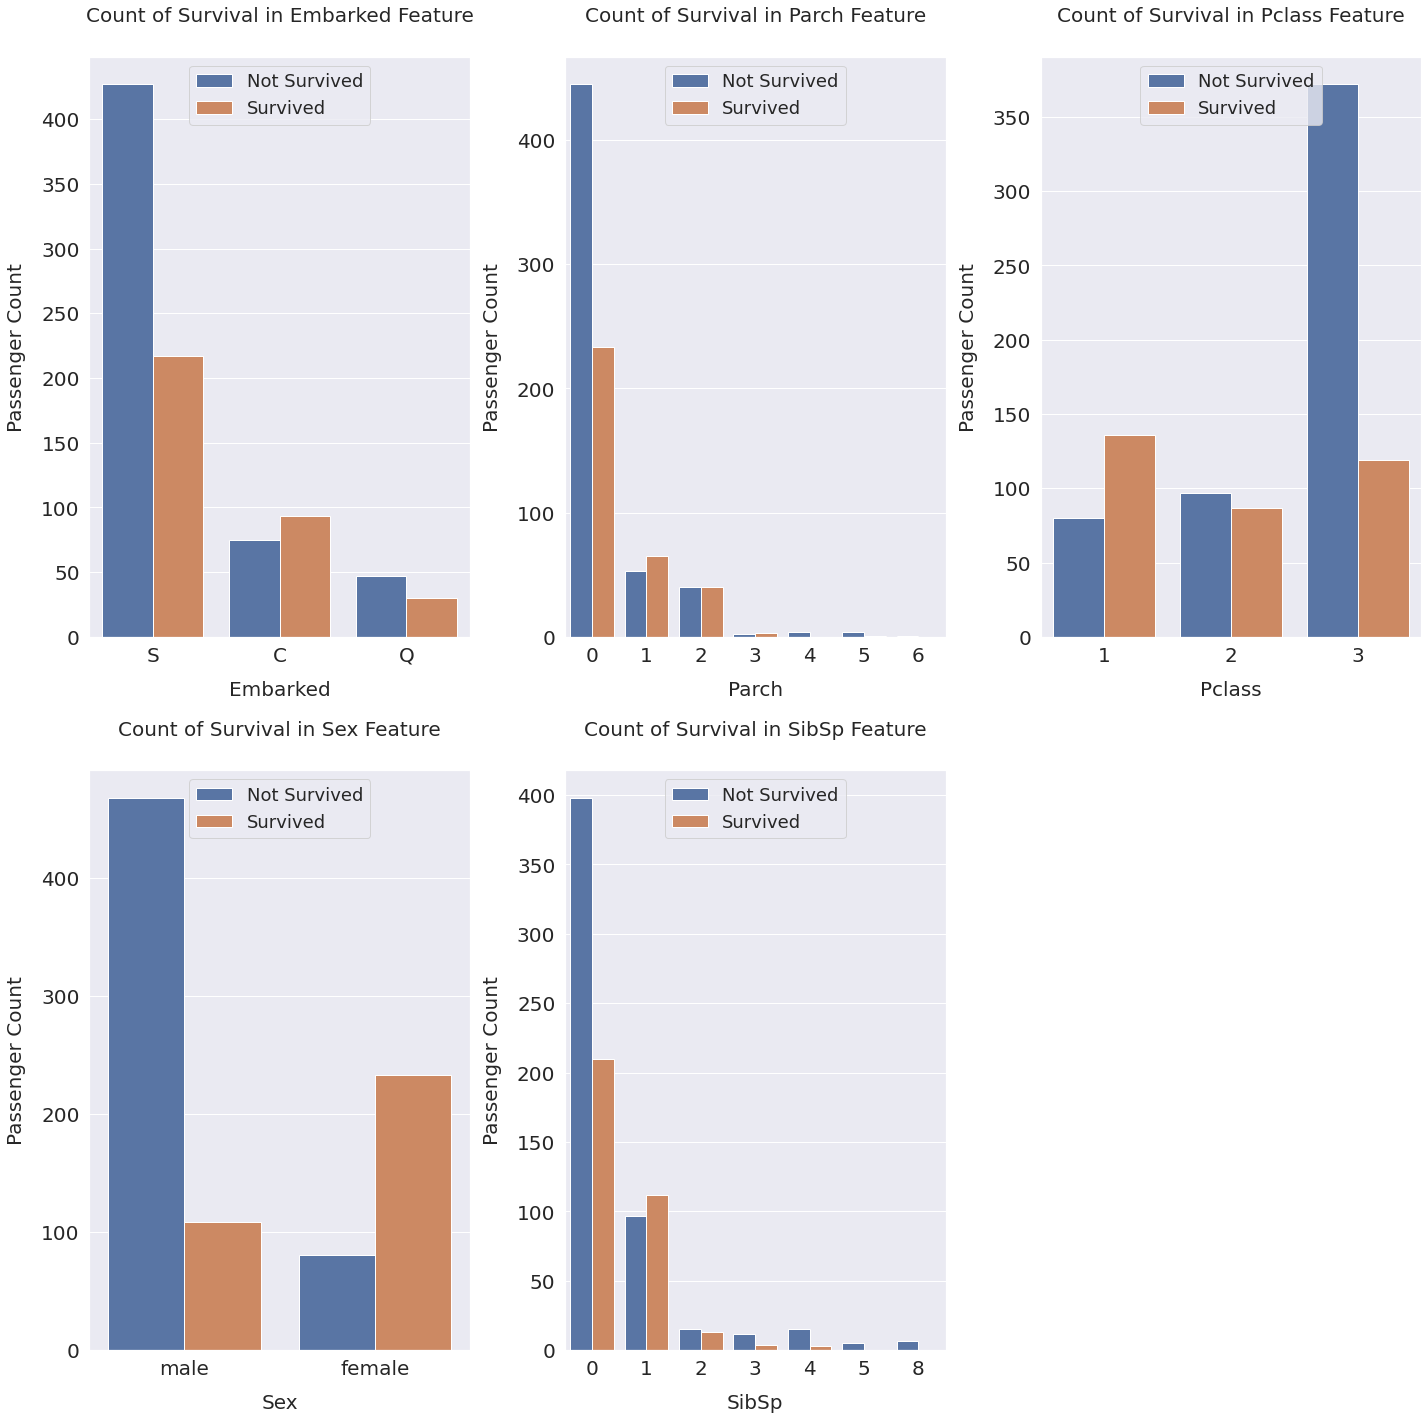

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(20,20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
	plt.subplot(2,3,i)
	sns.countplot(x=feature, hue='Survived', data=train_df)
	
	plt.xlabel('{}'.format(feature), size=20, labelpad=15)
	plt.ylabel('Passenger Count', size=20, labelpad=15)
	plt.tick_params(axis='x', labelsize=20)
	plt.tick_params(axis='y', labelsize=20)
	
	plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size':18})
	plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.tight_layout()
plt.show()

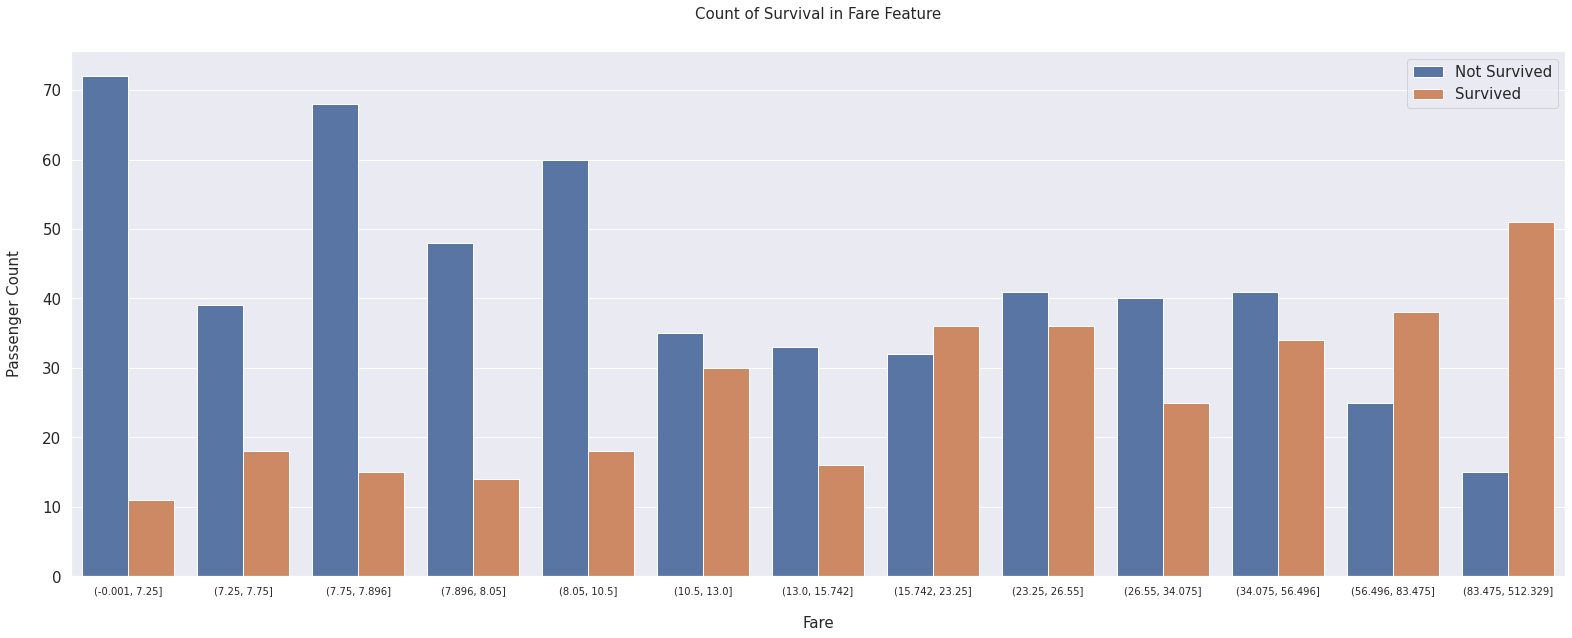

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

all_df = concat_df(train_df, test_df)

age_by_pclass_sex = all_df.groupby(['Sex', 'Pclass']).median()['Age']
all_df['Age'] = all_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
all_df['Embarked'] = all_df['Embarked'].fillna('S')
med_fare = all_df.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
all_df['Fare'] = all_df['Fare'].fillna(med_fare)

all_df['Fare'] = pd.qcut(all_df['Fare'], 13)

fig, axs = plt.subplots(figsize=(22,9))
sns.countplot(x='Fare', hue='Survived', data=all_df)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)
plt.tight_layout()
plt.show()


Sebelum mulai membuat model, 'Sex' dan 'Embarked' diubah menjadi int

In [ ]:
#Convert feature/column 'Sex'
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train_df['Sex']=LE.fit_transform(train_df['Sex'])

#Convert feature/column 'Embarked'
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train_df['Embarked']=LE.fit_transform(train_df['Embarked'])

In [ ]:
X = train_df[['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']]
y = train_df['Survived']

from sklearn.model_selection import train_test_split
#splitting X and y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print('Training Accuracy :', logreg.score(X_train,y_train))
print('Testing Accuracy :', logreg.score(X_test, y_test))

Training Accuracy : 0.800561797752809
Testing Accuracy : 0.7988826815642458


In [ ]:
#Logistic Regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg = linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

print('Training Accuracy :', linreg.score(X_train,y_train))
print('Testing Accuracy :', linreg.score(X_test, y_test))

Training Accuracy : 0.3642028133370766
Testing Accuracy : 0.4235261107713485


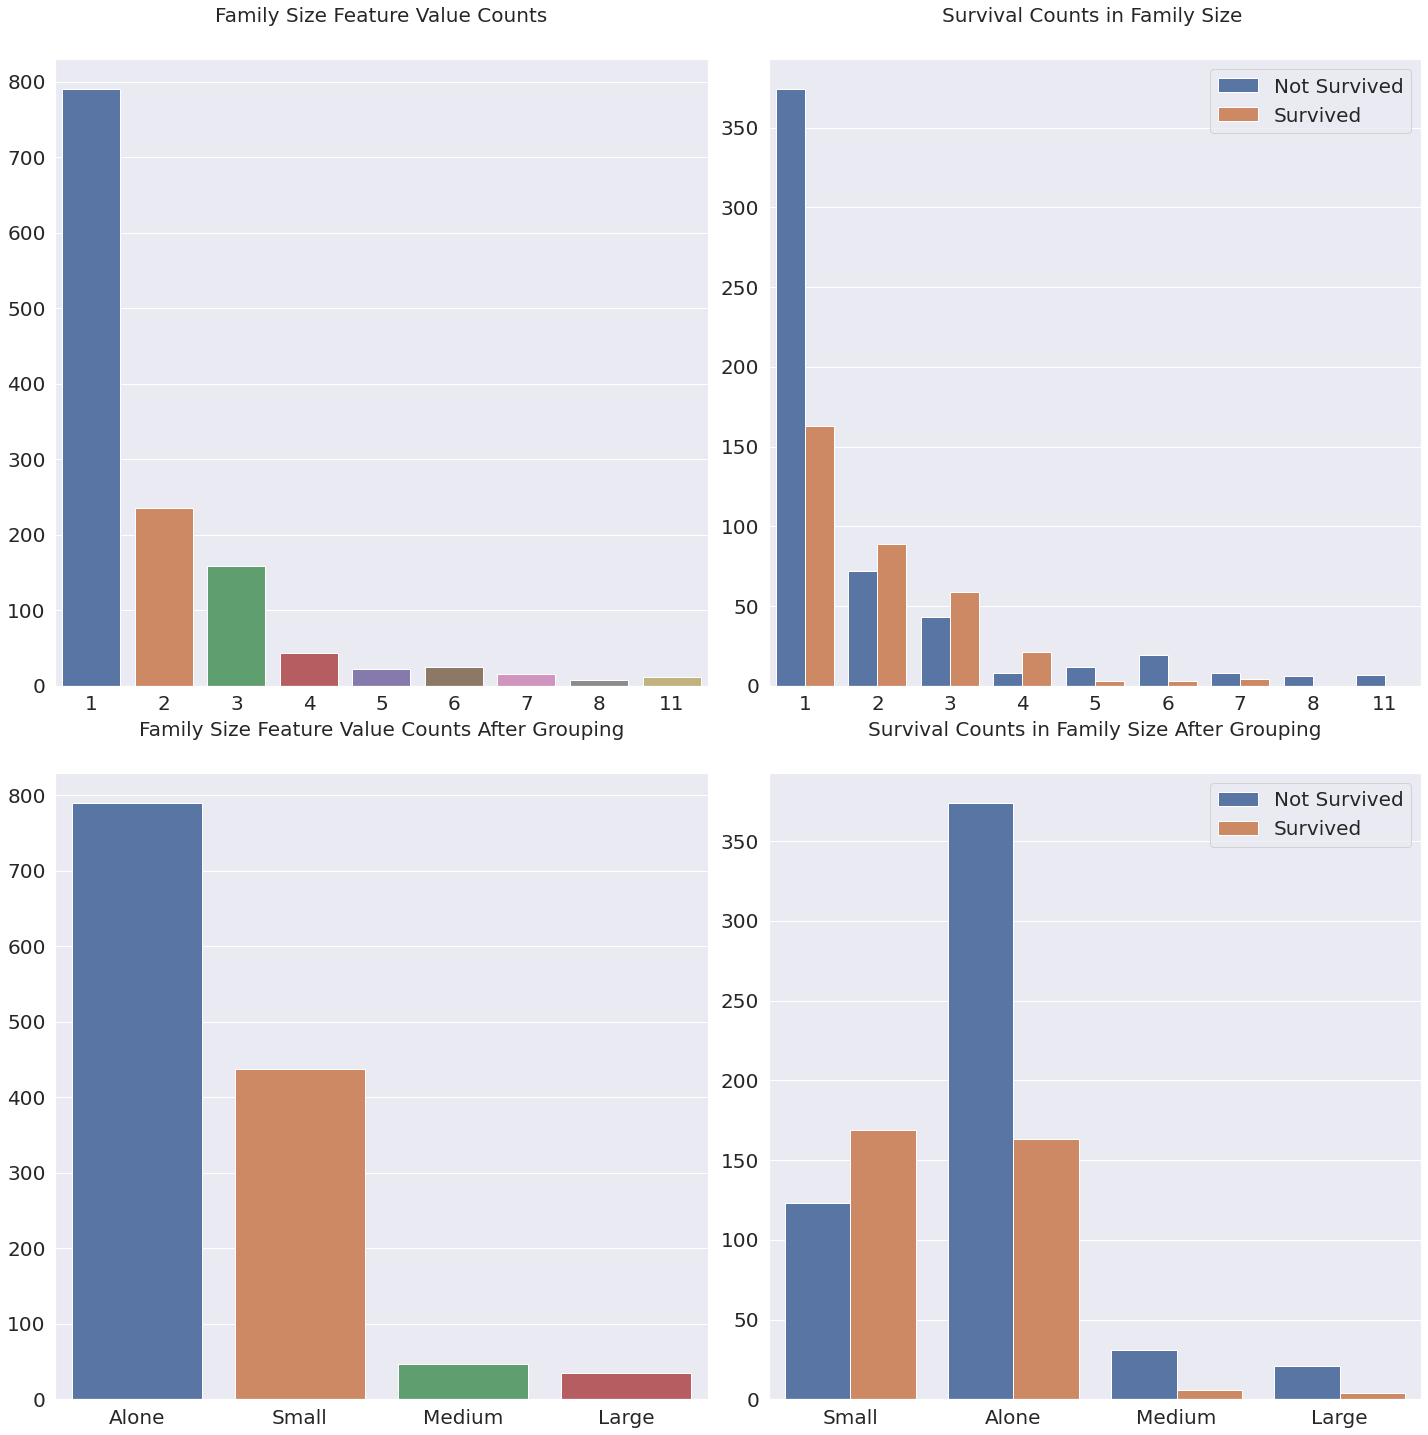

In [ ]:
all_df['Family_Size'] = all_df['SibSp'] + all_df['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=all_df['Family_Size'].value_counts().index, y=all_df['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=all_df, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
all_df['Family_Size_Grouped'] = all_df['Family_Size'].map(family_map)

sns.barplot(x=all_df['Family_Size_Grouped'].value_counts().index, y=all_df['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=all_df, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
plt.tight_layout()
plt.show()

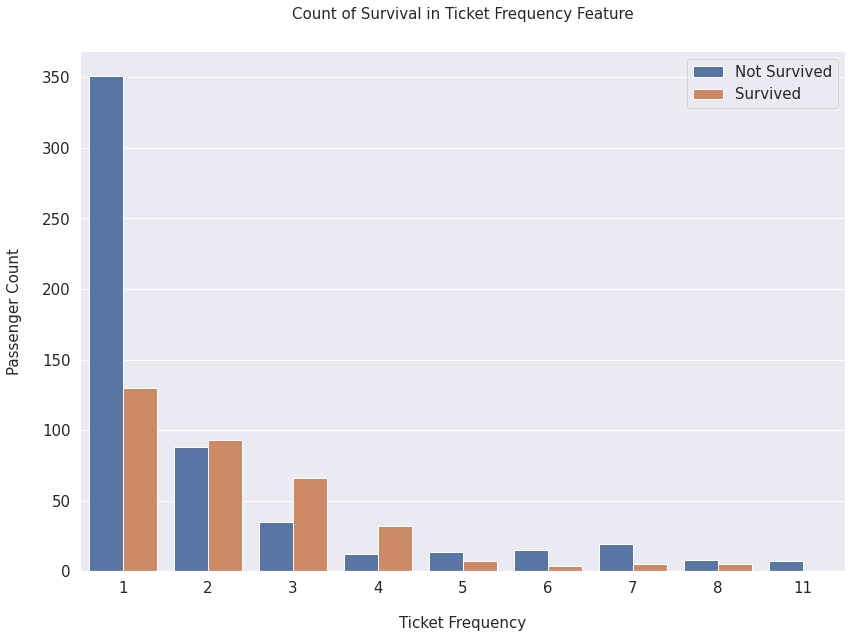

In [ ]:
all_df['Ticket_Frequency'] = all_df.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=all_df)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)
plt.tight_layout()
plt.show()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


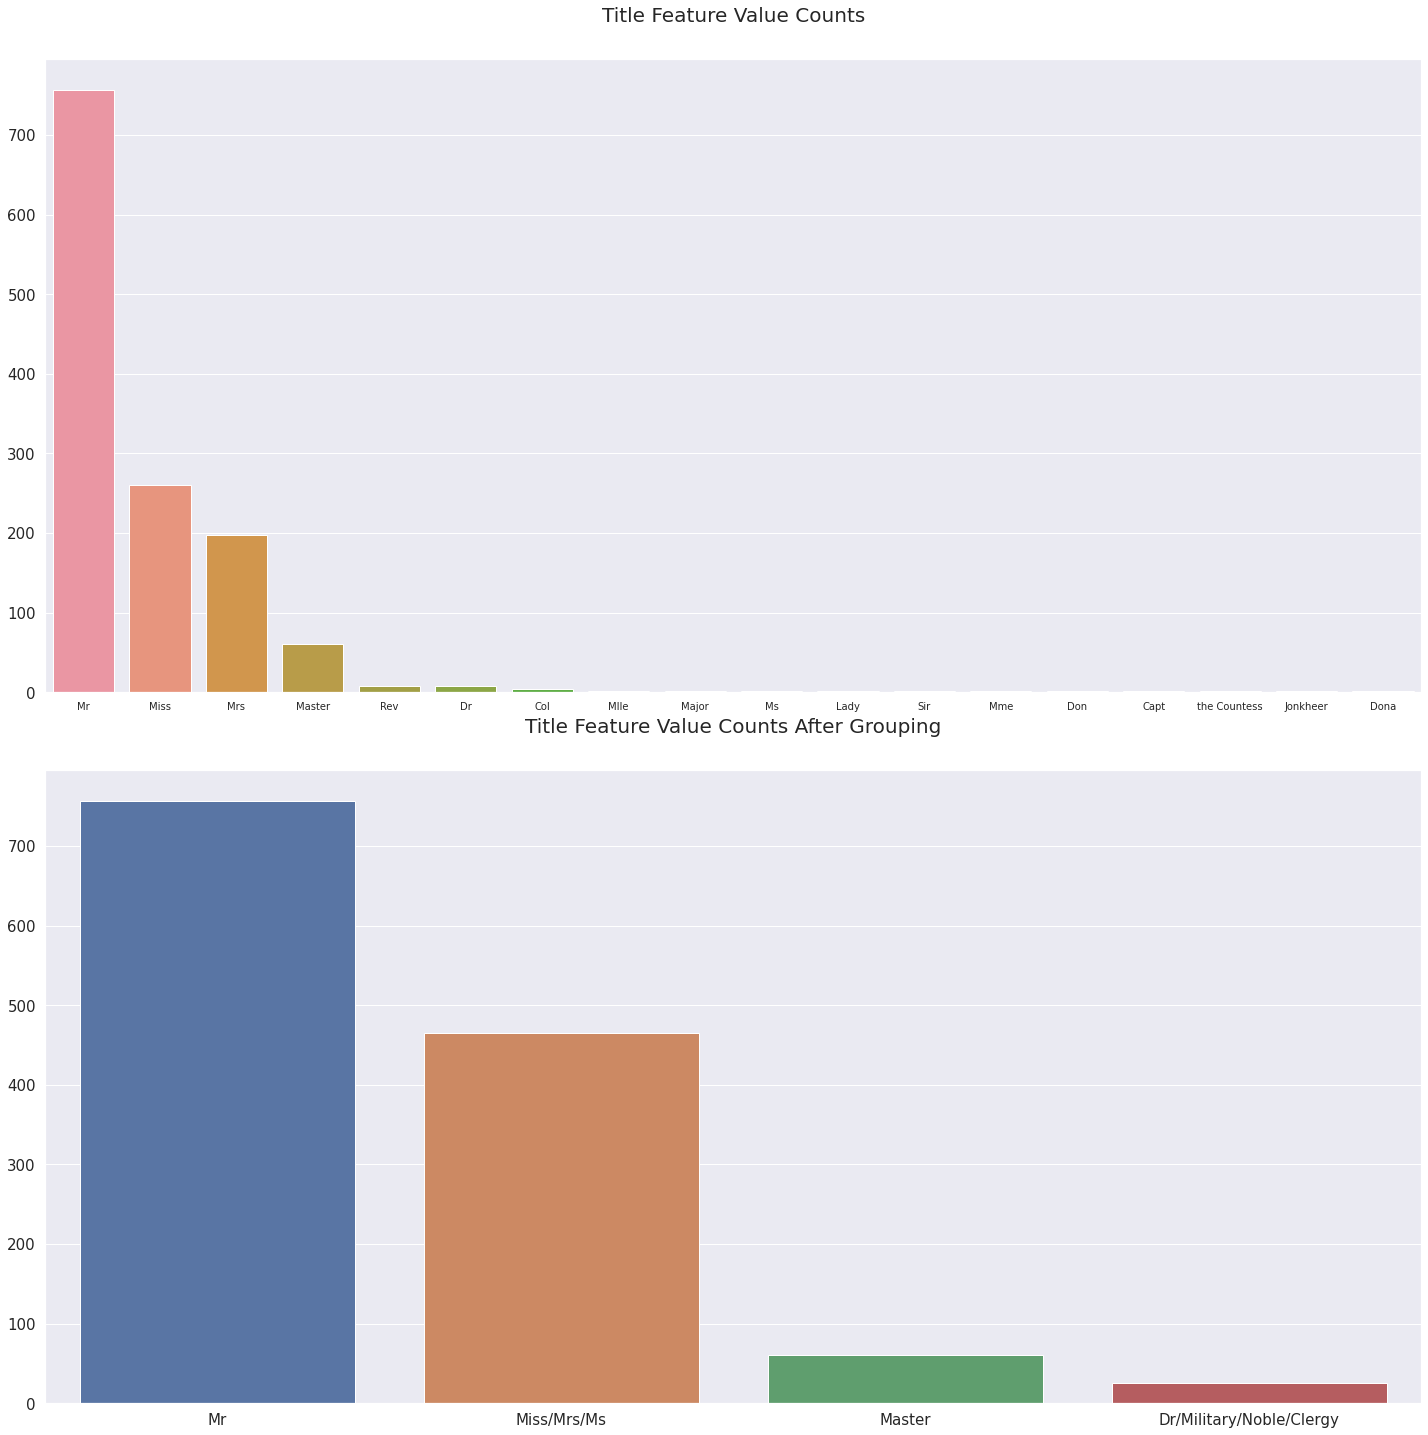

In [ ]:
all_df['Title'] = all_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

print(all_df['Title'].unique())

all_df['Is_Married'] = 0
all_df['Is_Married'].loc[all_df['Title'] == 'Mrs'] = 1

print(all_df['Title'].unique())

fig, axs = plt.subplots(nrows=2, figsize=(20,20))
sns.barplot(x=all_df['Title'].value_counts().index, y=all_df['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):
	axs[i].tick_params(axis='y', labelsize=15)
	
axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

all_df['Title'] = all_df['Title'].replace(['Miss', 'Mrs', 'Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
all_df['Title'] = all_df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=all_df['Title'].value_counts().index, y=all_df['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])
        
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived', 'Name', 'PassengerId', 'Pclass','Sex', 'Ticket', 'Title']

df_all.drop(columns=drop_cols, inplace=True)

print(df_all.head())

In [ ]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion='gini', 
                                       n_estimators=1100,
                                       max_depth=5,
                                       min_samples_split=4,
                                       min_samples_leaf=5,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=50)
random_forest.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())